Raw Data:
            Coffee_Sales
Date                    
2025-02-01          20.0
2025-02-02          22.0
2025-02-03          19.0
2025-02-04          25.0
2025-02-05          30.0
2025-02-06          35.0
2025-02-07          28.0
2025-02-08          21.0
2025-02-09          23.0
2025-02-10          20.0
2025-02-11          26.0
2025-02-12          32.0
2025-02-13          38.0
2025-02-14           NaN


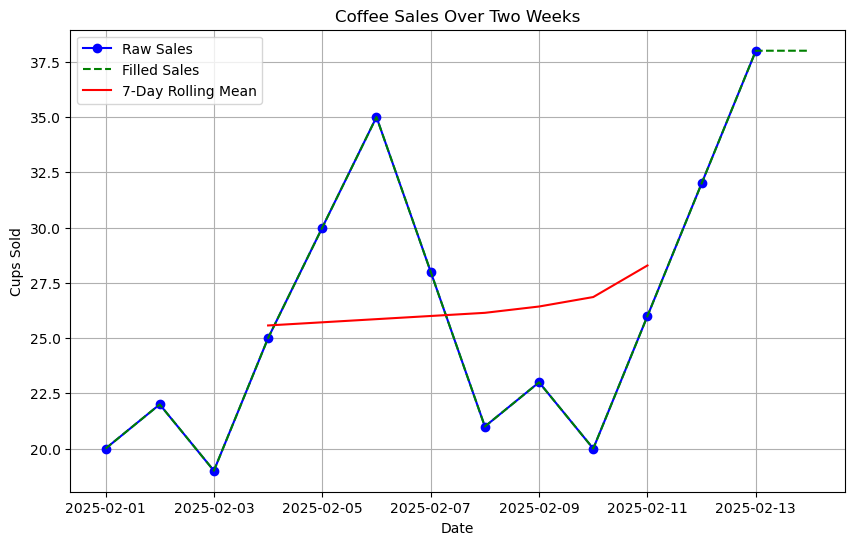


Basic Stats:
       Coffee_Sales  Coffee_Sales_Filled  Rolling_Mean
count     13.000000            14.000000      8.000000
mean      26.076923            26.928571     26.357143
std        6.143581             6.707794      0.880631
min       19.000000            19.000000     25.571429
25%       21.000000            21.250000     25.821429
50%       25.000000            25.500000     26.071429
75%       30.000000            31.500000     26.535714
max       38.000000            38.000000     28.285714


In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a simple time series dataset: coffee sales over 14 days
dates = pd.date_range(start='2025-02-01', end='2025-02-14', freq='D')  # 2 weeks in Feb 2025
sales = [20, 22, 19, 25, 30, 35, 28, 21, 23, 20, 26, 32, 38, np.nan]  # Sales with 1 missing value

# Put it in a DataFrame (like a table)
data = pd.DataFrame({'Date': dates, 'Coffee_Sales': sales})
data.set_index('Date', inplace=True)  # Use dates as the index

# Print the raw data
print("Raw Data:")
print(data)

# Handle missing value (interpolate)
data['Coffee_Sales_Filled'] = data['Coffee_Sales'].interpolate(method='linear')

# Calculate a 7-day rolling average to smooth noise
data['Rolling_Mean'] = data['Coffee_Sales_Filled'].rolling(window=7, center=True).mean()

# Plot everything
plt.figure(figsize=(10, 6))  # Set figure size
plt.plot(data.index, data['Coffee_Sales'], label='Raw Sales', marker='o', color='blue')  # Raw data with dots
plt.plot(data.index, data['Coffee_Sales_Filled'], label='Filled Sales', linestyle='--', color='green')  # Interpolated
plt.plot(data.index, data['Rolling_Mean'], label='7-Day Rolling Mean', color='red')  # Smoothed trend
plt.title('Coffee Sales Over Two Weeks')
plt.xlabel('Date')
plt.ylabel('Cups Sold')
plt.legend()
plt.grid(True)
plt.show()

# Basic stats to check patterns
print("\nBasic Stats:")
print(data.describe())